# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from IPython import get_ipython

In [3]:
%matplotlib inline
from IPython.core.pylabtools import figsize
figsize(12, 8)
sns.set()

## Parte 1

### _Setup_ da parte 1

In [4]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

dataframe

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21
...,...,...
9995,25.204408,22
9996,12.006620,24
9997,17.178733,17
9998,21.983062,23


## Inicie sua análise a partir da parte 1 a partir daqui

In [5]:
# Sua análise da parte 1 começa aqui.
print("----------Top-5- Record----------")
print(dataframe.head(5))
print("-----------Information-----------")
print(dataframe.info())
print("-----------Data Types-----------")
print(dataframe.dtypes)
print("----------Missing value-----------")
print(dataframe.isnull().sum())
print("----------Null value-----------")
print(dataframe.isna().sum())
print("----------Shape of Data----------")
print(dataframe.shape)

----------Top-5- Record----------
      normal  binomial
0  21.986857        18
1  19.446943        15
2  22.590754        14
3  26.092119        15
4  19.063387        21
-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   normal    10000 non-null  float64
 1   binomial  10000 non-null  int32  
dtypes: float64(1), int32(1)
memory usage: 117.3 KB
None
-----------Data Types-----------
normal      float64
binomial      int32
dtype: object
----------Missing value-----------
normal      0
binomial    0
dtype: int64
----------Null value-----------
normal      0
binomial    0
dtype: int64
----------Shape of Data----------
(10000, 2)


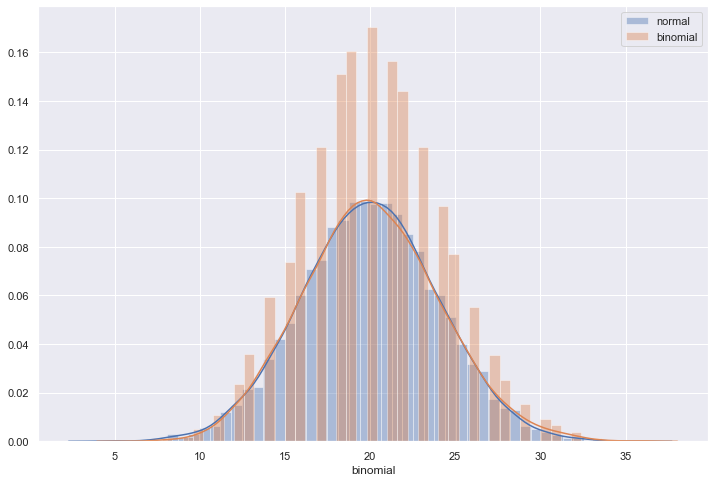

In [6]:
# Verificando o formato das distribuições:
sns.distplot(dataframe['normal']);
sns.distplot(dataframe['binomial']);
plt.legend(labels=['normal','binomial'])

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [13]:
def q1():
    quartis = dataframe.quantile([0.25, 0.5, 0.75])
    return tuple((quartis['normal'] - quartis['binomial']).round(3))

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [6]:
def q2():
    ecdf = ECDF(dataframe.normal)
    media = dataframe.normal.mean() 
    desvio = dataframe.normal.std()
    prob = ecdf(media+desvio) - ecdf(media-desvio)
    return float(prob.round(3))

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [7]:
def q3():
    m_binom = dataframe.binomial.mean()
    v_binom = dataframe.binomial.var()
    m_norm = dataframe.normal.mean()
    v_norm = dataframe.normal.var()
    return (round(m_binom - m_norm,3), round(v_binom - v_norm,3))

Para refletir:

* Você esperava valores dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

Aumentando o valor de $n$

In [7]:
dataframe2 = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(150, 0.2, size=10000)})

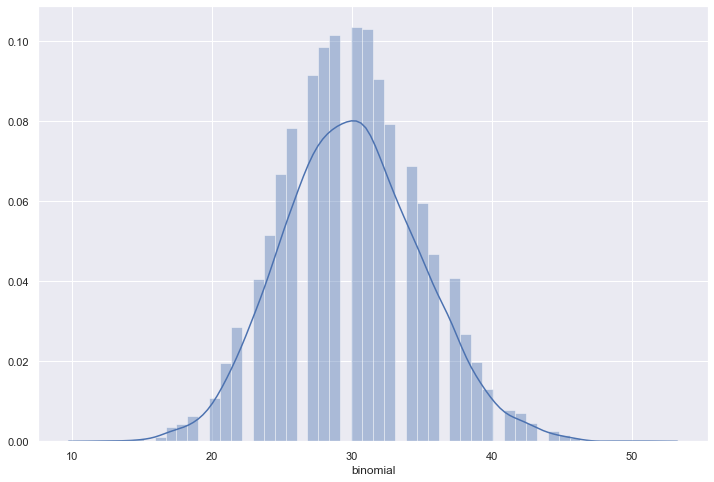

In [8]:
sns.distplot(dataframe2['binomial'])

Diminuindo o valor de $n$

In [9]:
dataframe3 = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(50, 0.2, size=10000)})

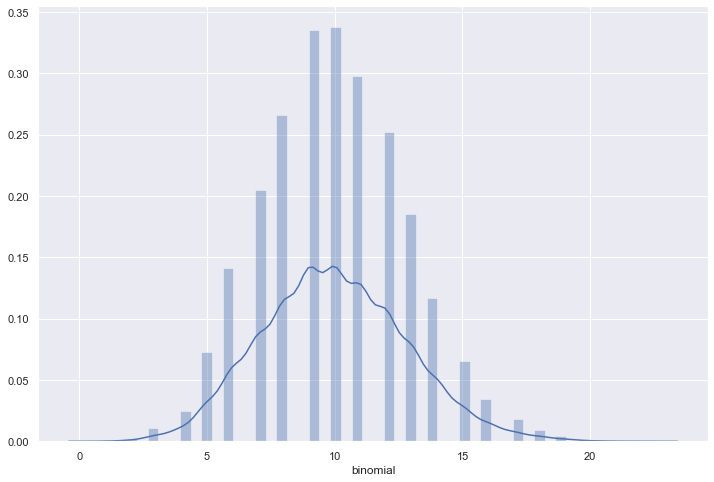

In [10]:
sns.distplot(dataframe3['binomial'])

## Parte 2

### _Setup_ da parte 2

In [12]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [13]:
# Sua análise da parte 2 começa aqui.
stars['mean_profile'].head()

0    102.507812
1    103.015625
2    136.750000
3     88.726562
4     93.570312
Name: mean_profile, dtype: float64

In [14]:
print("----------Top-5- Record----------")
print(stars.head(5))
print("-----------Information-----------")
print(stars.info())
print("-----------Data Types-----------")
print(stars.dtypes)
print("----------Missing value-----------")
print(stars.isnull().sum())
print("----------Null value-----------")
print(stars.isna().sum())
print("----------Shape of Data----------")
print(stars.shape)

----------Top-5- Record----------
   mean_profile  sd_profile  kurt_profile  skew_profile  mean_curve  \
0    102.507812   58.882430      0.465318     -0.515088    1.677258   
1    103.015625   39.341649      0.323328      1.051164    3.121237   
2    136.750000   57.178449     -0.068415     -0.636238    3.642977   
3     88.726562   40.672225      0.600866      1.123492    1.178930   
4     93.570312   46.698114      0.531905      0.416721    1.636288   

    sd_curve  kurt_curve  skew_curve  target  
0  14.860146   10.576487  127.393580   False  
1  21.744669    7.735822   63.171909   False  
2  20.959280    6.896499   53.593661   False  
3  11.468720   14.269573  252.567306   False  
4  14.545074   10.621748  131.394004   False  
-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mean_profile  17897 non-

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [10]:
def q4():
    filtro = stars[stars['target'] == 0]['mean_profile']
    padronizado = (filtro - filtro.mean()) / filtro.std()
    ecdf = ECDF(padronizado)
    Q_80, Q_90, Q_95 = sct.norm.ppf([0.80,0.90,0.95], loc=0, scale=1)
    return (round(ecdf(Q_80),3),round(ecdf(Q_90),3),round(ecdf(Q_95),3))

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [11]:
def q5():
    filtro = stars[stars['target'] == 0]['mean_profile']
    padronizado = (filtro - filtro.mean()) / filtro.std()
    Q1, Q2, Q3 = padronizado.quantile([0.25,0.5,0.75])
    norm_Q1 = sct.norm.ppf(0.25, loc=0, scale=1)
    norm_Q2 = sct.norm.ppf(0.50, loc=0, scale=1)
    norm_Q3 = sct.norm.ppf(0.75, loc=0, scale=1)
    return (round(Q1-norm_Q1,3),round(Q2-norm_Q2,3),round(Q3-norm_Q3,3))

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.